# Dan Ahimbisibwe - Exploratory Data Analysis - WEEK THREE

In [42]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [43]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

In [44]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [45]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long
count,16057.000000,16057.000000,16057.000000,16041.000000,16041.000000,1.605700e+04,1.605700e+04
mean,687.106309,334.772436,352.286853,53.213952,0.004617,4.070816e+01,-7.399951e+01
std,862.244605,417.807545,456.624509,18.036800,0.023400,5.762681e-12,1.124114e-11
min,0.000000,0.000000,0.000000,2.000000,0.000000,4.070816e+01,-7.399951e+01
25%,16.000000,9.000000,5.000000,39.000000,0.000000,4.070816e+01,-7.399951e+01
50%,227.000000,112.000000,111.000000,53.000000,0.000000,4.070816e+01,-7.399951e+01
75%,1254.000000,611.000000,632.000000,69.000000,0.000000,4.070816e+01,-7.399951e+01
max,4330.000000,3657.000000,2872.000000,97.000000,0.680400,4.070816e+01,-7.399951e+01


In [46]:
df.shape

(16057, 12)

In [47]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
dtype: int64

## 1.Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

C:\Users\User\AppData\Local\Temp\ipykernel_12780\4267386587.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='hour_beginning'>

Text(0.5, 1.0, 'Pedestrian Counts Per Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Pedestrian Counts')

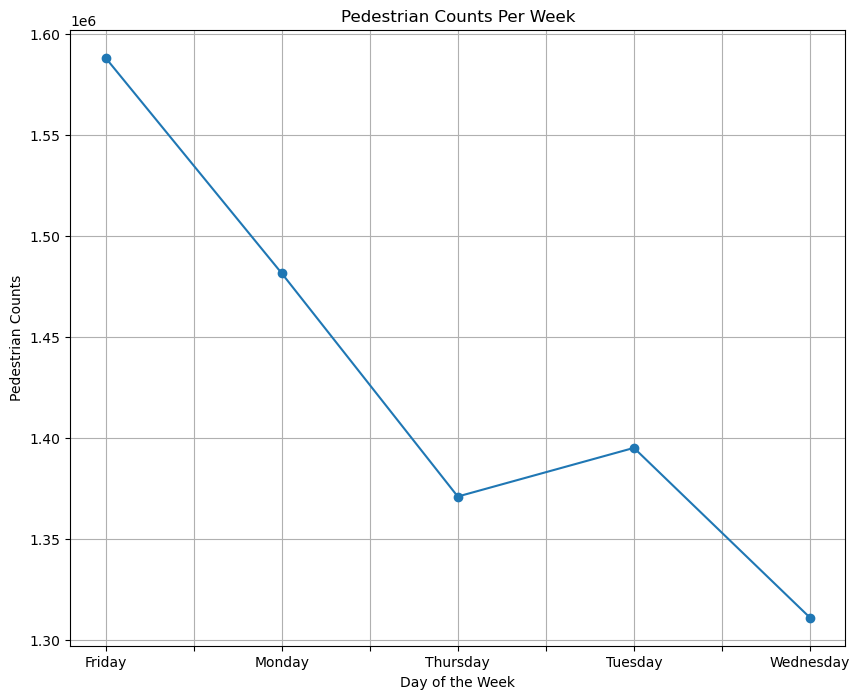

In [49]:

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


wdays = df[(df['hour_beginning'].dt.dayofweek >= 0) & (df['hour_beginning'].dt.dayofweek <= 4)]
pedestrian_couunts_per_day = wdays.groupby(wdays['hour_beginning'].dt.day_name())['Pedestrians'].sum()

plt.figure(figsize=(10, 8))
pedestrian_couunts_per_day.plot(kind='line', marker='o') 
plt.title('Pedestrian Counts Per Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()


## 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix  between Weather Patterns and Pedestrian Counts')

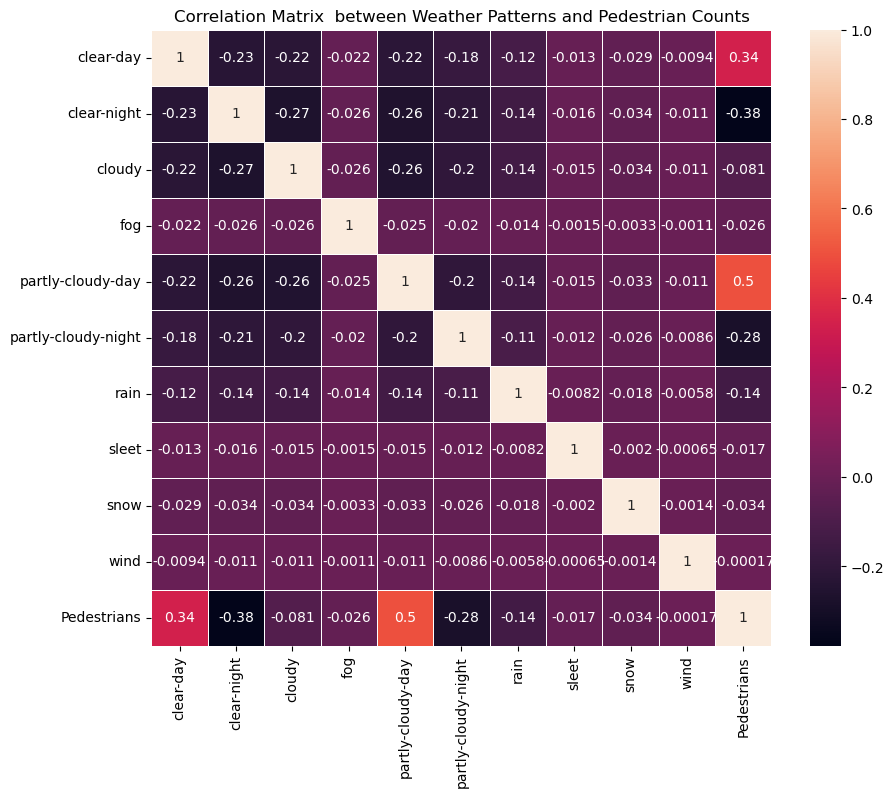

In [51]:
bridge_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

weather_encoded = pd.get_dummies(bridge_2019['weather_summary'])

encoded_data = pd.concat([weather_encoded, brooklyn_bridge_2019['Pedestrians']], axis=1)

correlation_matrix = encoded_data.corr()

#Corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix  between Weather Patterns and Pedestrian Counts')
plt.show()


## 3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

Pedestrian activity patterns throughout the day:
            Pedestrians                  
                  count     mean      sum
time_of_day                              
Afternoon          4014  1694.84  6803093
Evening            4014   426.21  1710794
Morning            4014   614.54  2466776
Night              4015    13.00    52203


<Figure size 1000x600 with 0 Axes>

<Axes: >

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Average Pedestrian Count by Time of Day')

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

<Axes: >

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Total Pedestrians by Time of Day')

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

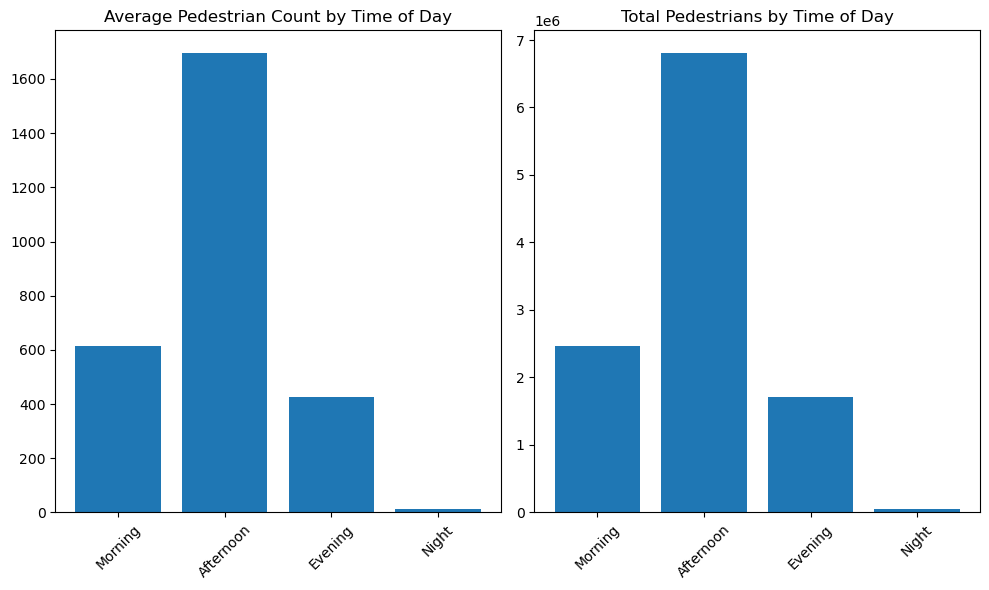

In [53]:
#function to categorize time of day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


df['hour_of_day'] = df['hour_beginning'].dt.hour
df['time_of_day'] = df['hour_of_day'].apply(categorize_time_of_day)


time_analysis = df.groupby('time_of_day').agg({'Pedestrians': ['count', 'mean', 'sum']}).round(2)

print("Pedestrian activity patterns throughout the day:")
print(time_analysis)

#Plots
plt.figure(figsize=(10, 6))
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_analysis_sorted = time_analysis.reindex(time_order)

plt.subplot(1, 2, 1)
plt.bar(time_order, time_analysis_sorted[('Pedestrians', 'mean')])
plt.title('Average Pedestrian Count by Time of Day')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(time_order, time_analysis_sorted[('Pedestrians', 'sum')])
plt.title('Total Pedestrians by Time of Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()